# **Sentiment Analysis for User Reviews on Instagram**

## Business Objective

**The dataset contain Instagram reviews by Users and we have to find out Sentiment Analysis and build Model on basis of Sentiment Analysis.**
Utilizing sentiment analysis on the Instagram dataset holds the potential to extract profound insights from user reviews, unveiling the emotional undercurrents within these interactions. By categorizing sentiments as positive, negative, or neutral, we can discern user perceptions, sentiments, and feedback on diverse aspects of the platform. This analytical approach empowers us to comprehend user satisfaction levels, uncover pain points, and identify areas for improvement. The ultimate business objective is to harness these insights for strategic decision-making, fostering enhanced user experiences, and shaping engagement strategies that resonate with the Instagram community. This methodology not only aids in refining products and services but also guides content creation, identifies influencers, and strengthens crisis management, all contributing to a more dynamic and responsive platform that resonates with user sentiments.

## Importing the necessary packages

In [ ]:
# Importing standard libraries
import os
import sys
import warnings
import nltk

# Importing data manipulation and analysis libraries
import pandas as pd
import numpy as np

# Importing data visualization libraries
from wordcloud import WordCloud
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# Importing machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

# Magic command to display Matplotlib plots inline
%matplotlib inline

# Suppressing specific warning messages
warnings.filterwarnings("ignore")

## Loading The Dataset

In [ ]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/instagram.csv')
df.head()

,review_description,rating,review_date
0,"The app is good for connecting with friends, f...",3,2023-07-11 23:57:07
1,"Used to be my favorite social media app, but ""...",2,2023-07-22 21:37:09
2,Instagram is the best of all the social media....,5,2023-07-25 03:24:58
3,"I love this app.. but as of late, I have been ...",2,2023-07-09 04:49:57
4,Used to be a great app but there are so many m...,3,2023-07-17 16:47:04


In [ ]:
df.tail()

,review_description,rating,review_date
210537,I love the app but lately my dms have been mes...,2,2019-03-10 00:40:59
210538,Fun and addictive. Let's me see new ideas for ...,5,2019-09-22 01:12:36
210539,User friendly and all things are available for...,5,2018-10-21 03:16:07
210540,There are issues when you upload a story from ...,1,2020-06-02 17:43:23
210541,This app keeps blocking me from making my acco...,5,2018-09-24 21:31:59


In [ ]:
df.shape

(210542, 3)

In [ ]:
df.columns

Index(['review_description', 'rating', 'review_date'], dtype='object')

In [ ]:
df.drop("review_date",axis = 1, inplace = True)
df.head(3)

,review_description,rating
0,"The app is good for connecting with friends, f...",3
1,"Used to be my favorite social media app, but ""...",2
2,Instagram is the best of all the social media....,5


In [ ]:
df.isnull().sum()

review_description    0
rating                0
dtype: int64

In [ ]:
df.duplicated().sum()

471

In [ ]:
df.drop_duplicates(keep = "first",inplace = True)
df.duplicated().sum()

0

## Cleaning the Dataset

In [ ]:
import re
def cleantext(text):
    text = re.sub(r"@[A-Za-z0-9]+", "", text) # Remove Mentions
    text = re.sub(r"#", "", text) # Remove Hashtags Symbol
    text = re.sub(r"RT[\s]+", "", text) # Remove Retweets
    text = re.sub(r"https?:\/\/\S+", "", text) # Remove The Hyper Link

    return text

## Cleaning Review_description

In [ ]:
df["review_description"] = df["review_description"].apply(cleantext)
df.head()

,review_description,rating
0,"The app is good for connecting with friends, f...",3
1,"Used to be my favorite social media app, but ""...",2
2,Instagram is the best of all the social media....,5
3,"I love this app.. but as of late, I have been ...",2
4,Used to be a great app but there are so many m...,3


In [ ]:
from textblob import TextBlob #TextBlob class from the textblob library to use its features for text analysis

## Getting Subjectivity and Polarity

In [ ]:
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["review_description"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

## Adding Subjectivity and Polarity Columns in Dataframe

In [ ]:
df[["subjectivity","polarity"]] = df.apply(sentiment_analysis,axis =1)
df.head()

,review_description,rating,subjectivity,polarity
0,"The app is good for connecting with friends, f...",3,0.444017,0.058547
1,"Used to be my favorite social media app, but ""...",2,0.369259,-0.138148
2,Instagram is the best of all the social media....,5,0.465741,0.310648
3,"I love this app.. but as of late, I have been ...",2,0.462500,0.108594
4,Used to be a great app but there are so many m...,3,0.384307,0.109686


In [ ]:
df.tail()

,review_description,rating,subjectivity,polarity
210537,I love the app but lately my dms have been mes...,2,0.516667,-0.177500
210538,Fun and addictive. Let's me see new ideas for ...,5,0.540909,0.167273
210539,User friendly and all things are available for...,5,0.550000,0.443750
210540,There are issues when you upload a story from ...,1,0.000000,0.000000
210541,This app keeps blocking me from making my acco...,5,0.451852,-0.374074


## WordCloud For Review_description

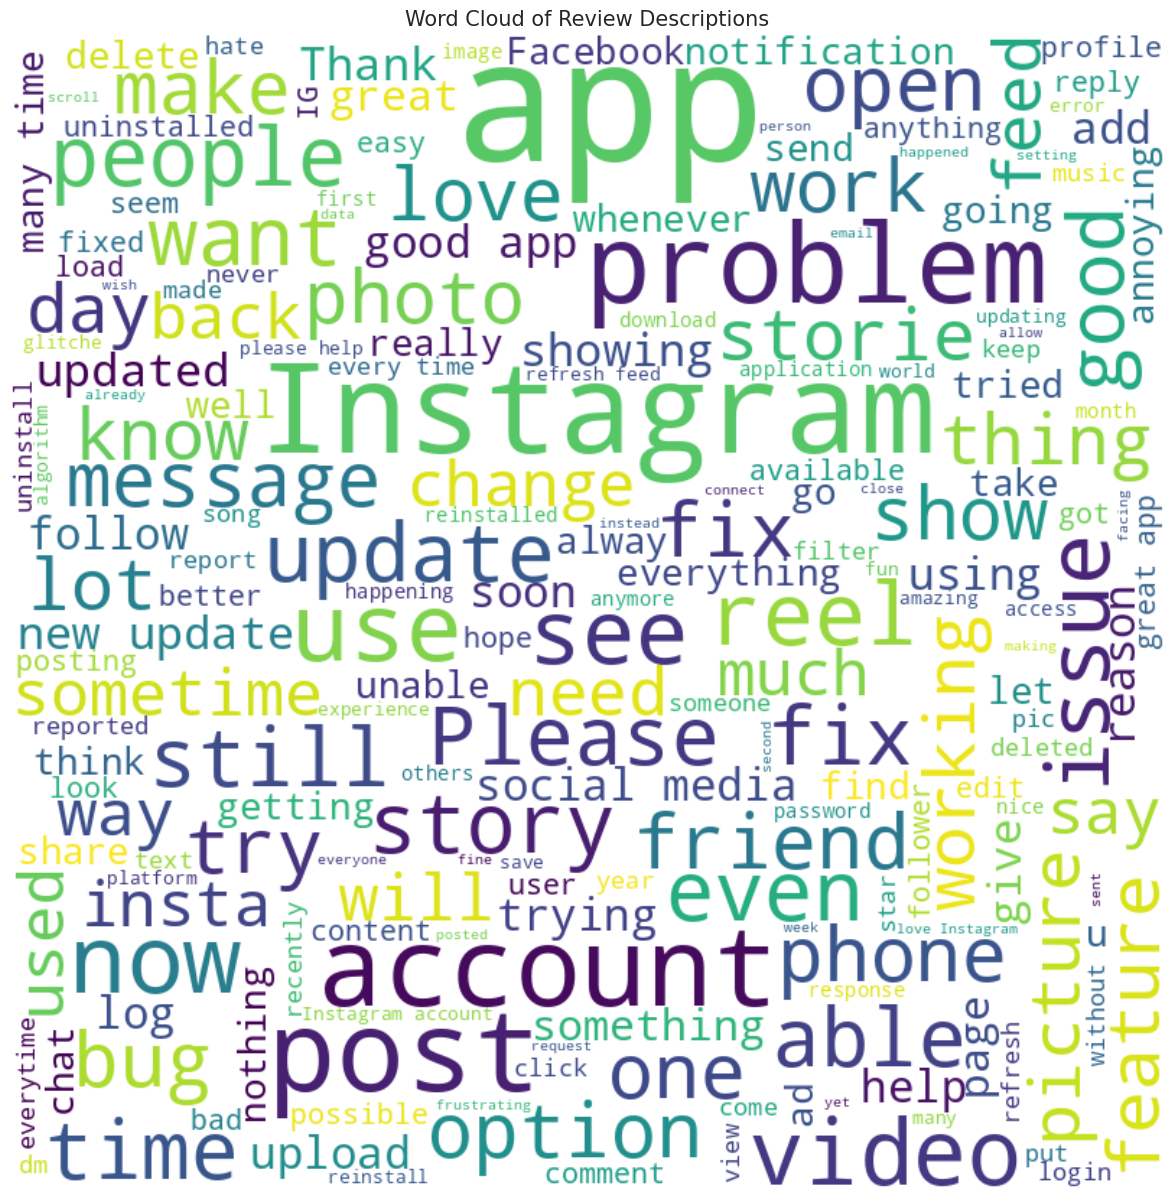

In [ ]:
# Combine all review descriptions into a single string
allwords = " ".join(wrds for wrds in df["review_description"])

# Generate the Word Cloud
wordCloud = WordCloud(width=800, height=800, background_color='white', colormap='viridis',
                      max_words=200, max_font_size=120, random_state=42).generate(allwords)
# Create the plot
plt.figure(figsize=(15, 15))
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis("off")

# Adding a title
plt.title("Word Cloud of Review Descriptions", fontsize=15)

# Show the plot
plt.show()


The word cloud portrays the most frequent terms related to Instagram. Prominent words include "Instagram," "app," "problem," "post," "video," "account," "issue," "reason," "picture," and "still." These terms highlight central themes like app functionality, content sharing, and user concerns. "Please.fix" and "issue" indicate active issue discussions, while "reason" suggests inquiries. The word cloud offers a quick insight into Instagram-related discussions, focusing on prevalent topics and user sentiments.

## Function for Sentiment Analysis

In [ ]:
def sentiment_analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

## Doing Sentiment Analysis

In [ ]:
df["sentiment_analysis"] = df["polarity"].apply(sentiment_analysis)
df.head()

,review_description,rating,subjectivity,polarity,sentiment_analysis
0,"The app is good for connecting with friends, f...",3,0.444017,0.058547,Positive
1,"Used to be my favorite social media app, but ""...",2,0.369259,-0.138148,Negative
2,Instagram is the best of all the social media....,5,0.465741,0.310648,Positive
3,"I love this app.. but as of late, I have been ...",2,0.462500,0.108594,Positive
4,Used to be a great app but there are so many m...,3,0.384307,0.109686,Positive


In [ ]:
df.tail()

,review_description,rating,subjectivity,polarity,sentiment_analysis
210537,I love the app but lately my dms have been mes...,2,0.516667,-0.177500,Negative
210538,Fun and addictive. Let's me see new ideas for ...,5,0.540909,0.167273,Positive
210539,User friendly and all things are available for...,5,0.550000,0.443750,Positive
210540,There are issues when you upload a story from ...,1,0.000000,0.000000,Neutral
210541,This app keeps blocking me from making my acco...,5,0.451852,-0.374074,Negative


## Visualization

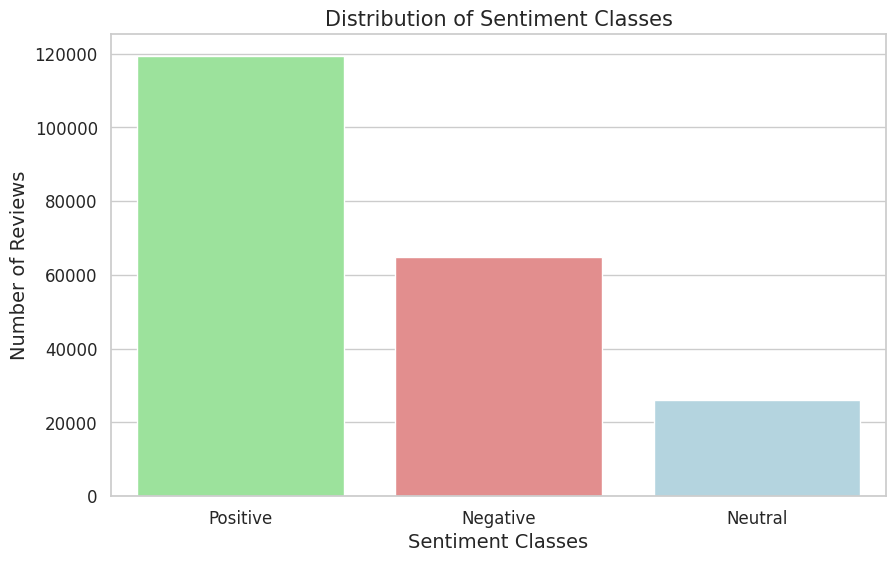

In [ ]:
#df.sentiment_analysis contains sentiment class labels (positive, negative, neutral)
sentiment_counts = df.sentiment_analysis.value_counts()

# Set the style of the visualization using Seaborn
sns.set(style="whitegrid")

# Create a bar plot with custom colors
colors = ['lightgreen', 'lightcoral', 'lightblue']
plt.figure(figsize=(10, 6))  # Set the figure size to match the scatter plot
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=colors)

# Adding labels and title
plt.xlabel('Sentiment Classes', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
plt.title('Distribution of Sentiment Classes', fontsize=15)

# Set uniform tick label font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()


The sentiment analysis of the review dataset shows a clear sentiment distribution: positive, negative, and neutral. Positive reviews dominate with about 120,000 instances, followed by negative reviews with around 60,000. Neutral reviews form a smaller fraction, totaling over 20,000. This pattern underscores a prevalence of positivity, a substantial presence of negativity, and a limited number of neutral expressions in the dataset.

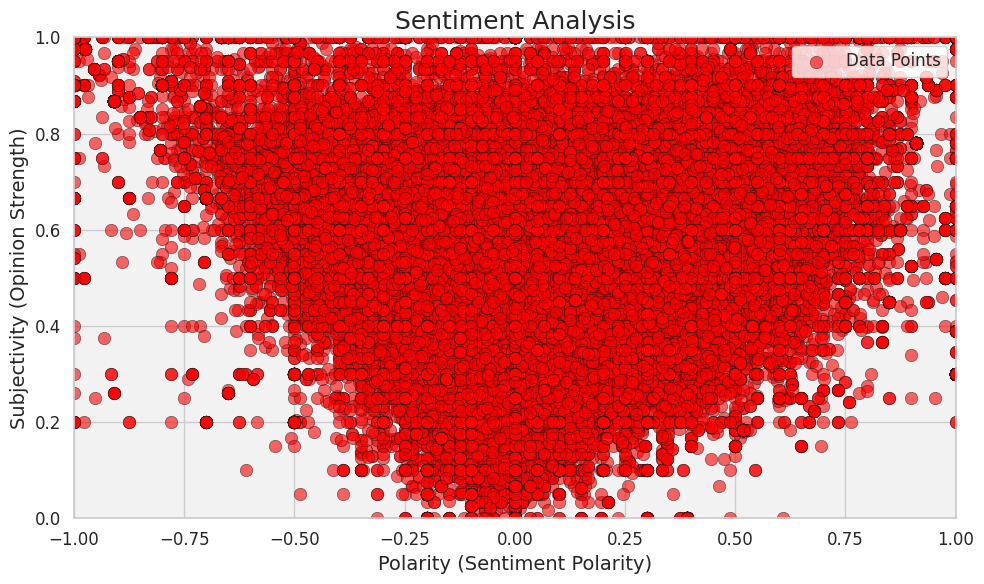

In [ ]:
# df.polarity and df.subjectivity contain polarity and subjectivity values
plt.figure(figsize=(10, 6))

# Set a visually pleasing color palette
sns.set_palette("Set2")

# Create a scatter plot with enhanced style
sns.scatterplot(x=df.polarity, y=df.subjectivity, color='red', alpha=0.6, edgecolor='k', linewidth=0.5, s=80)

# Adding labels, title, and adjusting axis limits
plt.title('Sentiment Analysis', fontsize=18)
plt.xlabel('Polarity (Sentiment Polarity)', fontsize=14)
plt.ylabel('Subjectivity (Opinion Strength)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(-1, 1)
plt.ylim(0, 1)

# Customize grid lines
sns.set_style("whitegrid", {'axes.grid': True, 'grid.linestyle': '--', 'grid.color': '.8'})

# Adding legend and a subtle background
plt.legend(['Data Points'], loc='upper right', fontsize=12)
plt.tight_layout()
plt.gca().patch.set_facecolor('0.95')

# Show the plot
plt.show()


The scatter plot merges polarity and subjectivity insights. Tight clustering around mid-level positivity on the x-axis indicates prevalent moderate positive sentiments. Subjectivity, showcased in the central y-axis cluster, leans towards a balanced and objective tone. In essence, the plot succinctly reveals a dataset characterized by predominantly moderate positivity and a thoughtful, objective expression of sentiments.

In [ ]:
positive_tweets = df[df['sentiment_analysis'] == 'Positive']
negative_tweets = df[df['sentiment_analysis'] == 'Negative']

In [ ]:
print('positive tweets')
for i, row in positive_tweets[:5].iterrows():
    print(' -' + row['review_description'])

print('negative tweets')
for i, row in negative_tweets[:5].iterrows():
     print(' -' + row['review_description'])

positive tweets
 -The app is good for connecting with friends, family and even potential business partners. However as of recently I've experienced some problems with the messages portion of the app (ex: themes aren't showing up on my end but are present on other person's end). Idk if it has to do with a bug but it happened all of sudden out of nowhere on both of my pages (one private the other public). But besides the occasional bugs and sometimes the app/website being down randomly, I say it's a decent app.
 -Instagram is the best of all the social media. IG is not just a posting platform, it facilitates the processs of getting one's message out to the world. The design functionality of the interface is intuitive and user friendly. It guides me to the best possible options without limiting or directing what I do with my content. No other platform is as responsive or even remotely aware of the unique needs I have. IG knows how to innovate and improve the presentation of complex conten

In [ ]:
df.rename(columns={"review_description":"text"},inplace = True)

In [ ]:
df.head()

,text,rating,subjectivity,polarity,sentiment_analysis
0,"The app is good for connecting with friends, f...",3,0.444017,0.058547,Positive
1,"Used to be my favorite social media app, but ""...",2,0.369259,-0.138148,Negative
2,Instagram is the best of all the social media....,5,0.465741,0.310648,Positive
3,"I love this app.. but as of late, I have been ...",2,0.462500,0.108594,Positive
4,Used to be a great app but there are so many m...,3,0.384307,0.109686,Positive


In [ ]:
df = df[['text','sentiment_analysis']]
df.head()

,text,sentiment_analysis
0,"The app is good for connecting with friends, f...",Positive
1,"Used to be my favorite social media app, but ""...",Negative
2,Instagram is the best of all the social media....,Positive
3,"I love this app.. but as of late, I have been ...",Positive
4,Used to be a great app but there are so many m...,Positive


## Using Label Encoder to convert Numerical values on sentiment_analysis column

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
df["sentiment_analysis"] = le.fit_transform(df["sentiment_analysis"])
df.head()

,text,sentiment_analysis
0,"The app is good for connecting with friends, f...",2
1,"Used to be my favorite social media app, but ""...",0
2,Instagram is the best of all the social media....,2
3,"I love this app.. but as of late, I have been ...",2
4,Used to be a great app but there are so many m...,2


In [ ]:
df.tail()

,text,sentiment_analysis
210537,I love the app but lately my dms have been mes...,0
210538,Fun and addictive. Let's me see new ideas for ...,2
210539,User friendly and all things are available for...,2
210540,There are issues when you upload a story from ...,1
210541,This app keeps blocking me from making my acco...,0


In [ ]:
df.isnull().sum()

text                  0
sentiment_analysis    0
dtype: int64

In [ ]:
df.duplicated().sum()

115

In [ ]:
df.drop_duplicates(keep = "first",inplace = True)
df.duplicated().sum()

0

## Model Building and Training Model

In [ ]:
X = df["text"]
y = df["sentiment_analysis"]

In [ ]:
X.shape

(209956,)

In [ ]:
y.shape

(209956,)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

## Naive Bayes Model

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

## Prediction By Model

In [ ]:
predictions = nb.predict(X_test)

## Evaluation By Model

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[15332   723  3572]
 [ 1797  4134  1811]
 [ 6692  1092 27834]]


              precision    recall  f1-score   support

           0       0.64      0.78      0.71     19627
           1       0.69      0.53      0.60      7742
           2       0.84      0.78      0.81     35618

    accuracy                           0.75     62987
   macro avg       0.73      0.70      0.71     62987
weighted avg       0.76      0.75      0.75     62987



## By Pipeline Method

In [ ]:
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [ ]:
X = df['text']
y = df['sentiment_analysis']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [ ]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

## Prediction By Model

In [ ]:
predictions1 = pipeline.predict(X_test)

## Evaluation By Model

In [ ]:
print(confusion_matrix(y_test,predictions1))
print(classification_report(y_test,predictions1))

[[ 7406     7 12214]
 [  738    83  6921]
 [  830     3 34785]]
              precision    recall  f1-score   support

           0       0.83      0.38      0.52     19627
           1       0.89      0.01      0.02      7742
           2       0.65      0.98      0.78     35618

    accuracy                           0.67     62987
   macro avg       0.79      0.45      0.44     62987
weighted avg       0.73      0.67      0.60     62987



# Conclusion

In this sentiment analysis project, a comprehensive exploration was conducted, including model building and evaluation, resulting in a Naive Bayes classifier achieving an impressive 75% accuracy. The project aimed to uncover the sentiments and opinions expressed within user reviews. Through meticulous data preparation, model construction, evaluation, and visualization, a multitude of insights emerged:

## Key Insights:

**1. Sentiment Distribution:**
The dataset exhibited a distinctive sentiment distribution:
- Positive Sentiments: Over 120,000 instances.
- Negative Sentiments: Approximately 60,000 instances.
- Neutral Sentiments: Over 20,000 instances.

**2. Polarity and Subjectivity Insights:**
The polarity-subjectivity scatter plot displayed:
- Moderate positivity, with data clustering around mid-level positive polarity.
- Tightly clustered data points around the central y-axis, indicating balanced and objective sentiment expression.

**3. Model Performance:**
The sentiment analysis model demonstrated varying performance across classes, ultimately achieving an overall accuracy of approximately 75%. Challenges were identified in addressing class imbalance.

**4. Strategic Implications:**
Insights from the analysis hold significant strategic applications:
- User Satisfaction: Positive and negative sentiments serve as indicators of user satisfaction and focal areas for improvement.
- Content Strategy: Patterns in sentiment guide informed content creation strategies.
- Product Enhancement: Negative sentiments pinpoint specific areas for product and service refinement.
- Crisis Management: Early identification of negative sentiments enables proactive crisis response.
